In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Flight_Booking[1].csv')

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [ ]:
df.shape

(65697, 12)

In [ ]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
col=['stops','arrival_time','destination_city', 'class', 'duration', 'days_left','price']

In [ ]:
for i in  col:
  if df[i].dtypes==int or df[i].dtypes==float:
      df[i]=df[i].fillna(value=df[i].median())
  else:
     df[i]=df[i].fillna(value=df[i].mode()[0])


In [ ]:
df.dropna()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
65691,Air_India,AI-809,Mumbai,Morning,one,Morning,Kolkata,Economy,23.00,25.0,4556.0
65692,Air_India,AI-888,Mumbai,Evening,one,Evening,Kolkata,Economy,24.17,25.0,4556.0
65693,Air_India,AI-660,Mumbai,Evening,one,Evening,Kolkata,Economy,25.17,25.0,4556.0
65694,Air_India,AI-442,Mumbai,Afternoon,one,Evening,Kolkata,Economy,27.58,25.0,4556.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,65696.0,10.793848,7.159881,1.58,5.5,9.17,14.75,40.0
days_left,65696.0,25.291433,13.605887,1.00,14.0,25.00,37.00,49.0
price,65696.0,6422.345744,3725.805286,1998.00,4007.0,5761.00,7426.00,35145.0


<Axes: xlabel='airline', ylabel='price'>

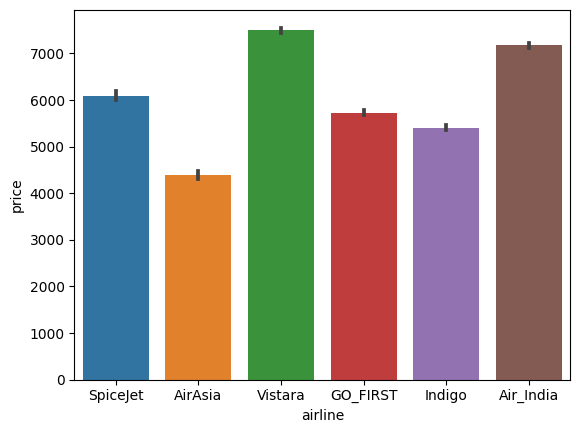

In [ ]:
sns.barplot(x='airline',y='price',data=df)

above graph shows
variations price in different airlines
Vistara airline has highest price

<Axes: xlabel='days_left', ylabel='price'>

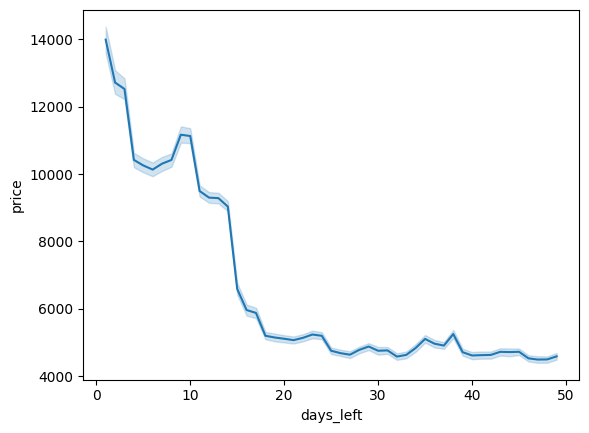

In [ ]:
sns.lineplot(x='days_left',y='price',data=df)

In [ ]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0


In [ ]:
df['class'].unique()

array(['Economy'], dtype=object)

<Axes: xlabel='class', ylabel='price'>

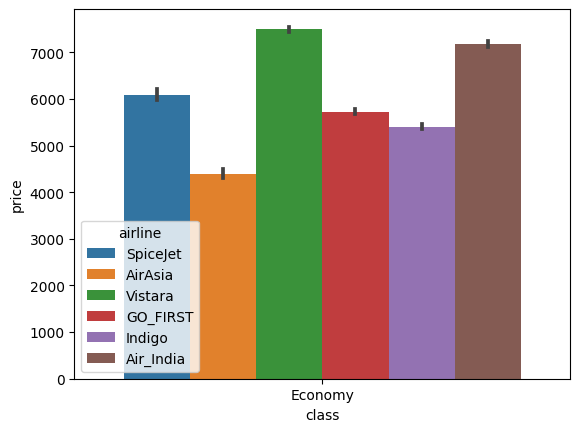

In [ ]:
sns.barplot(x='class',y='price',hue='airline',data=df)

Text(0.5, 1.0, 'Frequency of class')

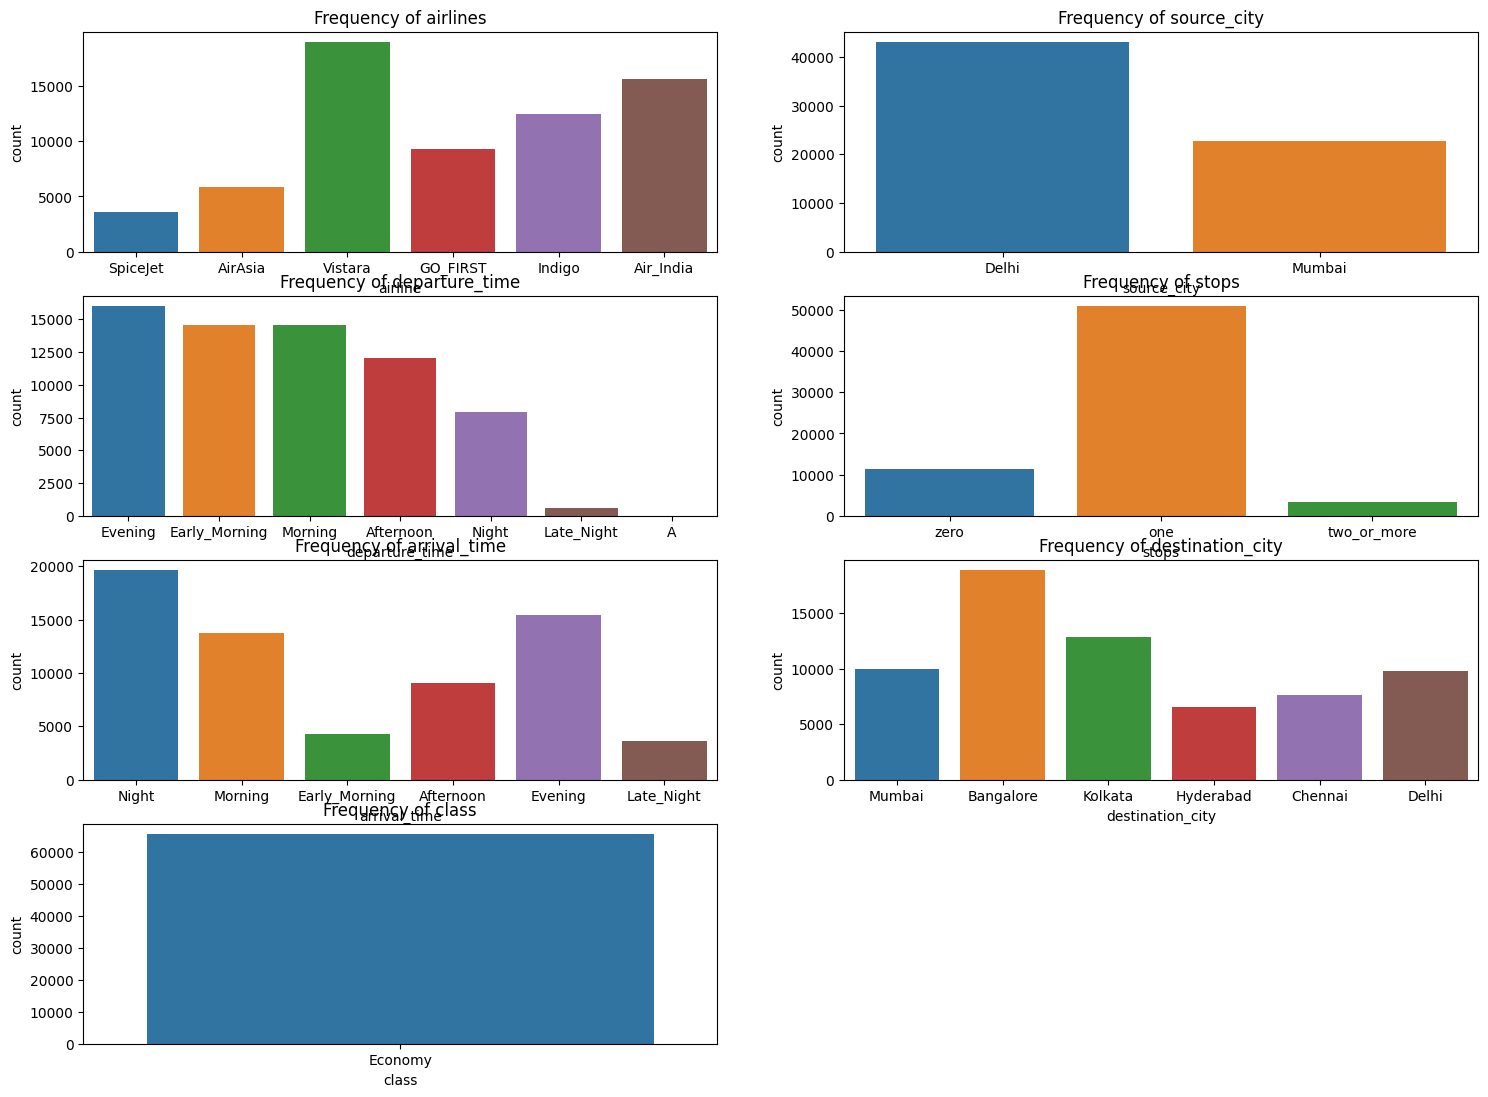

In [ ]:
plt.figure(figsize=(18,20))
plt.subplot(6,2,1)
sns.countplot(x='airline',data=df)
plt.title('Frequency of airlines')

plt.subplot(6,2,2)
sns.countplot(x='source_city',data=df)
plt.title('Frequency of source_city')


plt.subplot(6,2,3)
sns.countplot(x='departure_time',data=df)
plt.title('Frequency of departure_time')

plt.subplot(6,2,4)
sns.countplot(x='stops',data=df)
plt.title('Frequency of stops')

plt.subplot(6,2,5)
sns.countplot(x='arrival_time',data=df)
plt.title('Frequency of arrival_time')

plt.subplot(6,2,6)
sns.countplot(x='destination_city',data=df)
plt.title('Frequency of destination_city')

plt.subplot(6,2,7)
sns.countplot(x='class',data=df)
plt.title('Frequency of class')

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
for i in df.columns:
  if df[i].dtypes==object:
     print(df[i].unique())
     print('---------')

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
---------
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
---------
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
---------
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
---------
['zero' 'one' 'two_or_more']
---------
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
---------
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
---------
['Economy' 'Business']
---------


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtypes==object:
    df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
col=[]
for i in df.columns:
  if (df[i].dtypes!=object and i!='price'):
    col.append(i)

x=df[col]
vif=pd.DataFrame()
vif['features']=x.columns
vif['values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif

,features,values
0,airline,6.701818
1,flight,12.675046
2,source_city,2.969540
3,departure_time,2.806009
4,stops,1.437326
5,arrival_time,3.784873
6,destination_city,2.918792
7,class,2.852072
8,duration,4.754588
9,days_left,4.071591


In [ ]:
df.drop('flight',axis=1,inplace=True)

In [ ]:
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49
300149,5,1481,1,0,0,5,3,0,10.42,49
300150,5,1486,1,1,0,5,3,0,13.83,49
300151,5,1483,1,1,0,2,3,0,10.00,49


In [ ]:
col=[]
for i in df.columns:
  if (df[i].dtypes!=object and i!='price'):
    col.append(i)

x=df[col]
vif=pd.DataFrame()
vif['features']=x.columns
vif['values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif

,features,values
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [ ]:
x=df.drop(columns=['price'])
y=df['price']

In [ ]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(240122, 9)
(60031, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [ ]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

array([[ 1.03364765,  0.24034564, -0.80697699, ...,  0.67215456,
        -0.79489955,  0.88522009],
       [ 1.03364765, -0.32995067, -0.23667249, ...,  0.67215456,
        -0.02998342,  1.18038482],
       [-1.14929386,  0.24034564,  1.47424099, ...,  0.67215456,
         0.2481679 , -1.25472424],
       ...,
       [-0.60355848,  1.38093825, -1.37728148, ...,  0.67215456,
        -1.38597111,  0.66384654],
       [ 1.03364765, -0.90024697,  0.9039365 , ...,  0.67215456,
        -0.30813474, -0.59060359],
       [-0.0578231 ,  1.38093825, -0.80697699, ...,  0.67215456,
        -0.79489955, -1.84505371]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([ 7316.09563029,  9331.40165821, 11922.30139732, ...,
        5414.40681037, 52000.01371532,  3607.68190133])

In [ ]:
y_test

37442     14293
26706      6821
172802     9079
240001    58125
82508      5152
          ...  
210007    41281
284192    51819
104379     5179
256618    56476
84990      7488
Name: price, Length: 60031, dtype: int64

In [ ]:
dif=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predict'])
dif

,Actual,Predict
0,14293.0,7316.095630
1,6821.0,9331.401658
2,9079.0,11922.301397
3,58125.0,54807.215390
4,5152.0,5630.948883
...,...,...
60026,41281.0,54094.388343
60027,51819.0,54868.291260
60028,5179.0,5414.406810
60029,56476.0,52000.013715


In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4663.972330361725
49935993.915964566
7066.540448901751


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9034289957447658